# Project 4: Poisonous Mushrooms

**Overview**

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

## Grading
---
- Make sure to answer every part in every question.
 - There are 6 equally weighted questions.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean and well commented,
   - and if the functions or answers are too long.

 ## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

In [ ]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [ ]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [ ]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [ ]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Question 1:PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

Notes:
* The pandas DataFrame [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html) function may be helpful.
* You can use `PCA` to produce a PCA analysis.

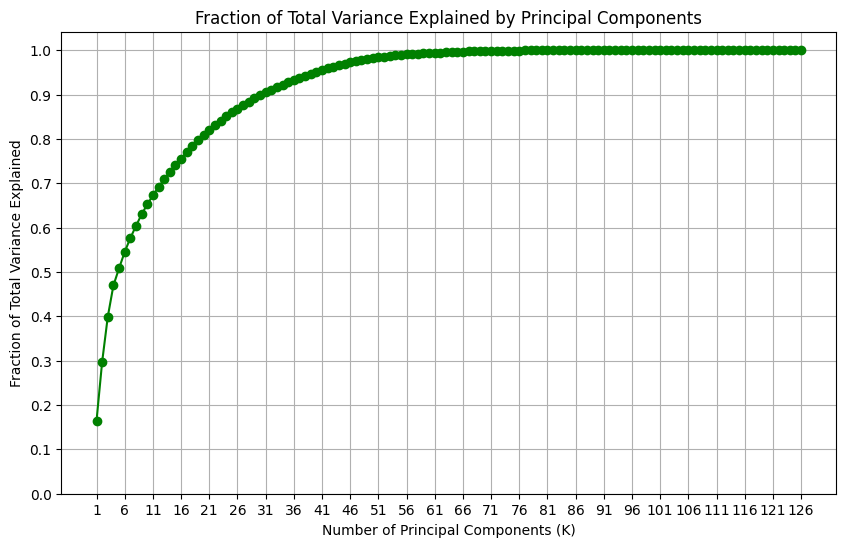

Fraction of total variance explained by the first k principal components:
k = 1: 0.1640433127933427
k = 2: 0.29727810148781514
k = 3: 0.3990126667092806
k = 4: 0.46964623105914016
k = 5: 0.5083126945661666
k = 10: 0.652214832562752
k = 20: 0.8089677659561175
k = 30: 0.8985493780560346
k = 40: 0.9509282406029382
k = 50: 0.9821028525657515


In [ ]:
def P1():
    ## STUDENT START ###

    # Perform PCA
    pca = PCA()
    pca.fit(train_data)

    # Calculate variance explained by each principal component
    variance_explained = pca.explained_variance_ratio_

    # Compute cumulative variance explained
    cum_variance_explained = np.cumsum(variance_explained)

    # Plotting
    num_components = len(variance_explained)
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, num_components + 1), cum_variance_explained, marker='o', linestyle='-', color='green')
    plt.title('Fraction of Total Variance Explained by Principal Components')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel('Fraction of Total Variance Explained')
    plt.grid(True)
    plt.xticks(np.arange(1, num_components + 1, 5))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()

    # Print fraction of total variance for specific k values
    k_values = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    print("Fraction of total variance explained by the first k principal components:")
    for k in k_values:
        print(f"k = {k}: {cum_variance_explained[k - 1]}")

    ## STUDENT END ###

P1()

### Question 2: PCA for visualization

PCA can be very useful for visualizing data.
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.
* Be sure to add a title, axis labels and a legend to your graph.

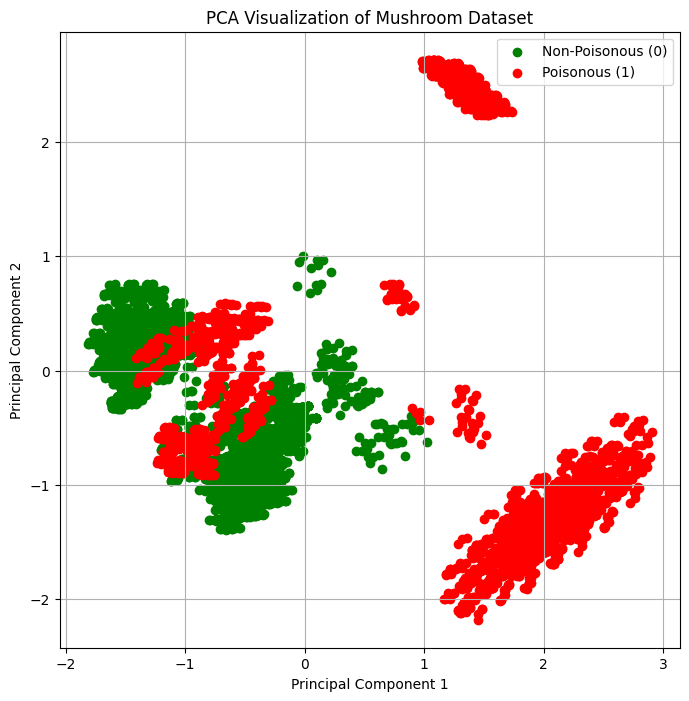

In [ ]:
def Q2():
  ### STUDENT START ###

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(train_data)
    train_data_pca = pca.transform(train_data)

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.scatter(train_data_pca[train_labels == 0, 0], train_data_pca[train_labels == 0, 1], color='green', label='Non-Poisonous (0)')
    plt.scatter(train_data_pca[train_labels == 1, 0], train_data_pca[train_labels == 1, 1], color='red', label='Poisonous (1)')
    plt.title('PCA Visualization of Mushroom Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

  ### STUDENT END ###

Q2()

### Question 3: Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data.
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


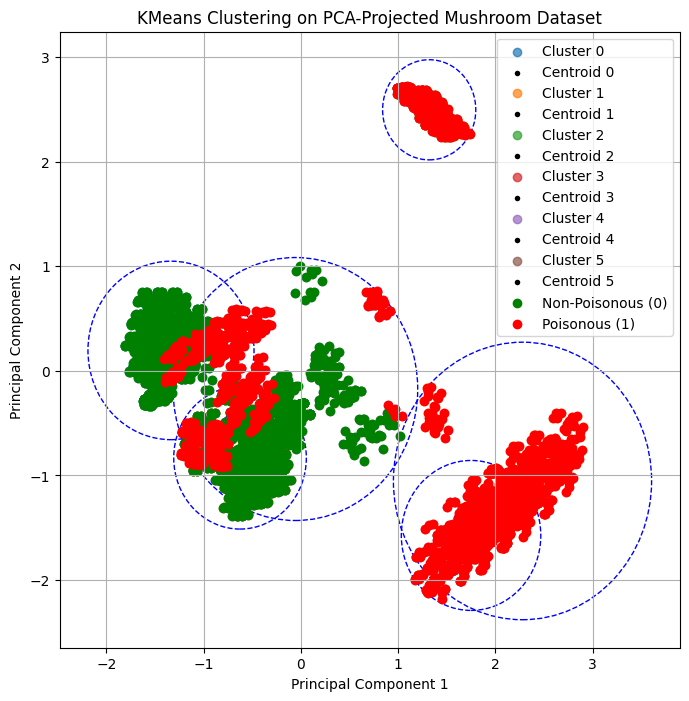

In [ ]:
def Q3():

  ### STUDENT START ###

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(train_data)
    train_data_pca = pca.transform(train_data)

    # Fit KMeans to the 2D projected data
    kmeans = KMeans(n_clusters=6, random_state=0)
    kmeans.fit(train_data_pca)

    # Get cluster centroids and distances
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Calculate maximum distance from centroid for each cluster
    max_distances = np.zeros(6)
    for i in range(6):
        cluster_points = train_data_pca[labels == i]
        centroid = centroids[i]
        max_distance = np.max([norm(point - centroid) for point in cluster_points])
        max_distances[i] = max_distance

    # Plotting
    plt.figure(figsize=(8, 8))

    # Plot clusters
    for i in range(6):
        cluster_points = train_data_pca[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', alpha=0.7)
        plt.scatter(centroids[i, 0], centroids[i, 1], marker='o', color='black', edgecolors='white', linewidths=2, label=f'Centroid {i}')
        circle = plt.Circle(centroids[i], max_distances[i], color='blue', fill=False, linestyle='--')
        plt.gca().add_patch(circle)

    # Plot poisonous and non-poisonous examples
    plt.scatter(train_data_pca[train_labels == 0, 0], train_data_pca[train_labels == 0, 1], color='g', label='Non-Poisonous (0)')
    plt.scatter(train_data_pca[train_labels == 1, 0], train_data_pca[train_labels == 1, 1], color='r', label='Poisonous (1)')

    plt.title('KMeans Clustering on PCA-Projected Mushroom Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

  ### STUDENT END ###

Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data.
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours.
    - Each row showing a different number of mixture components.
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters.

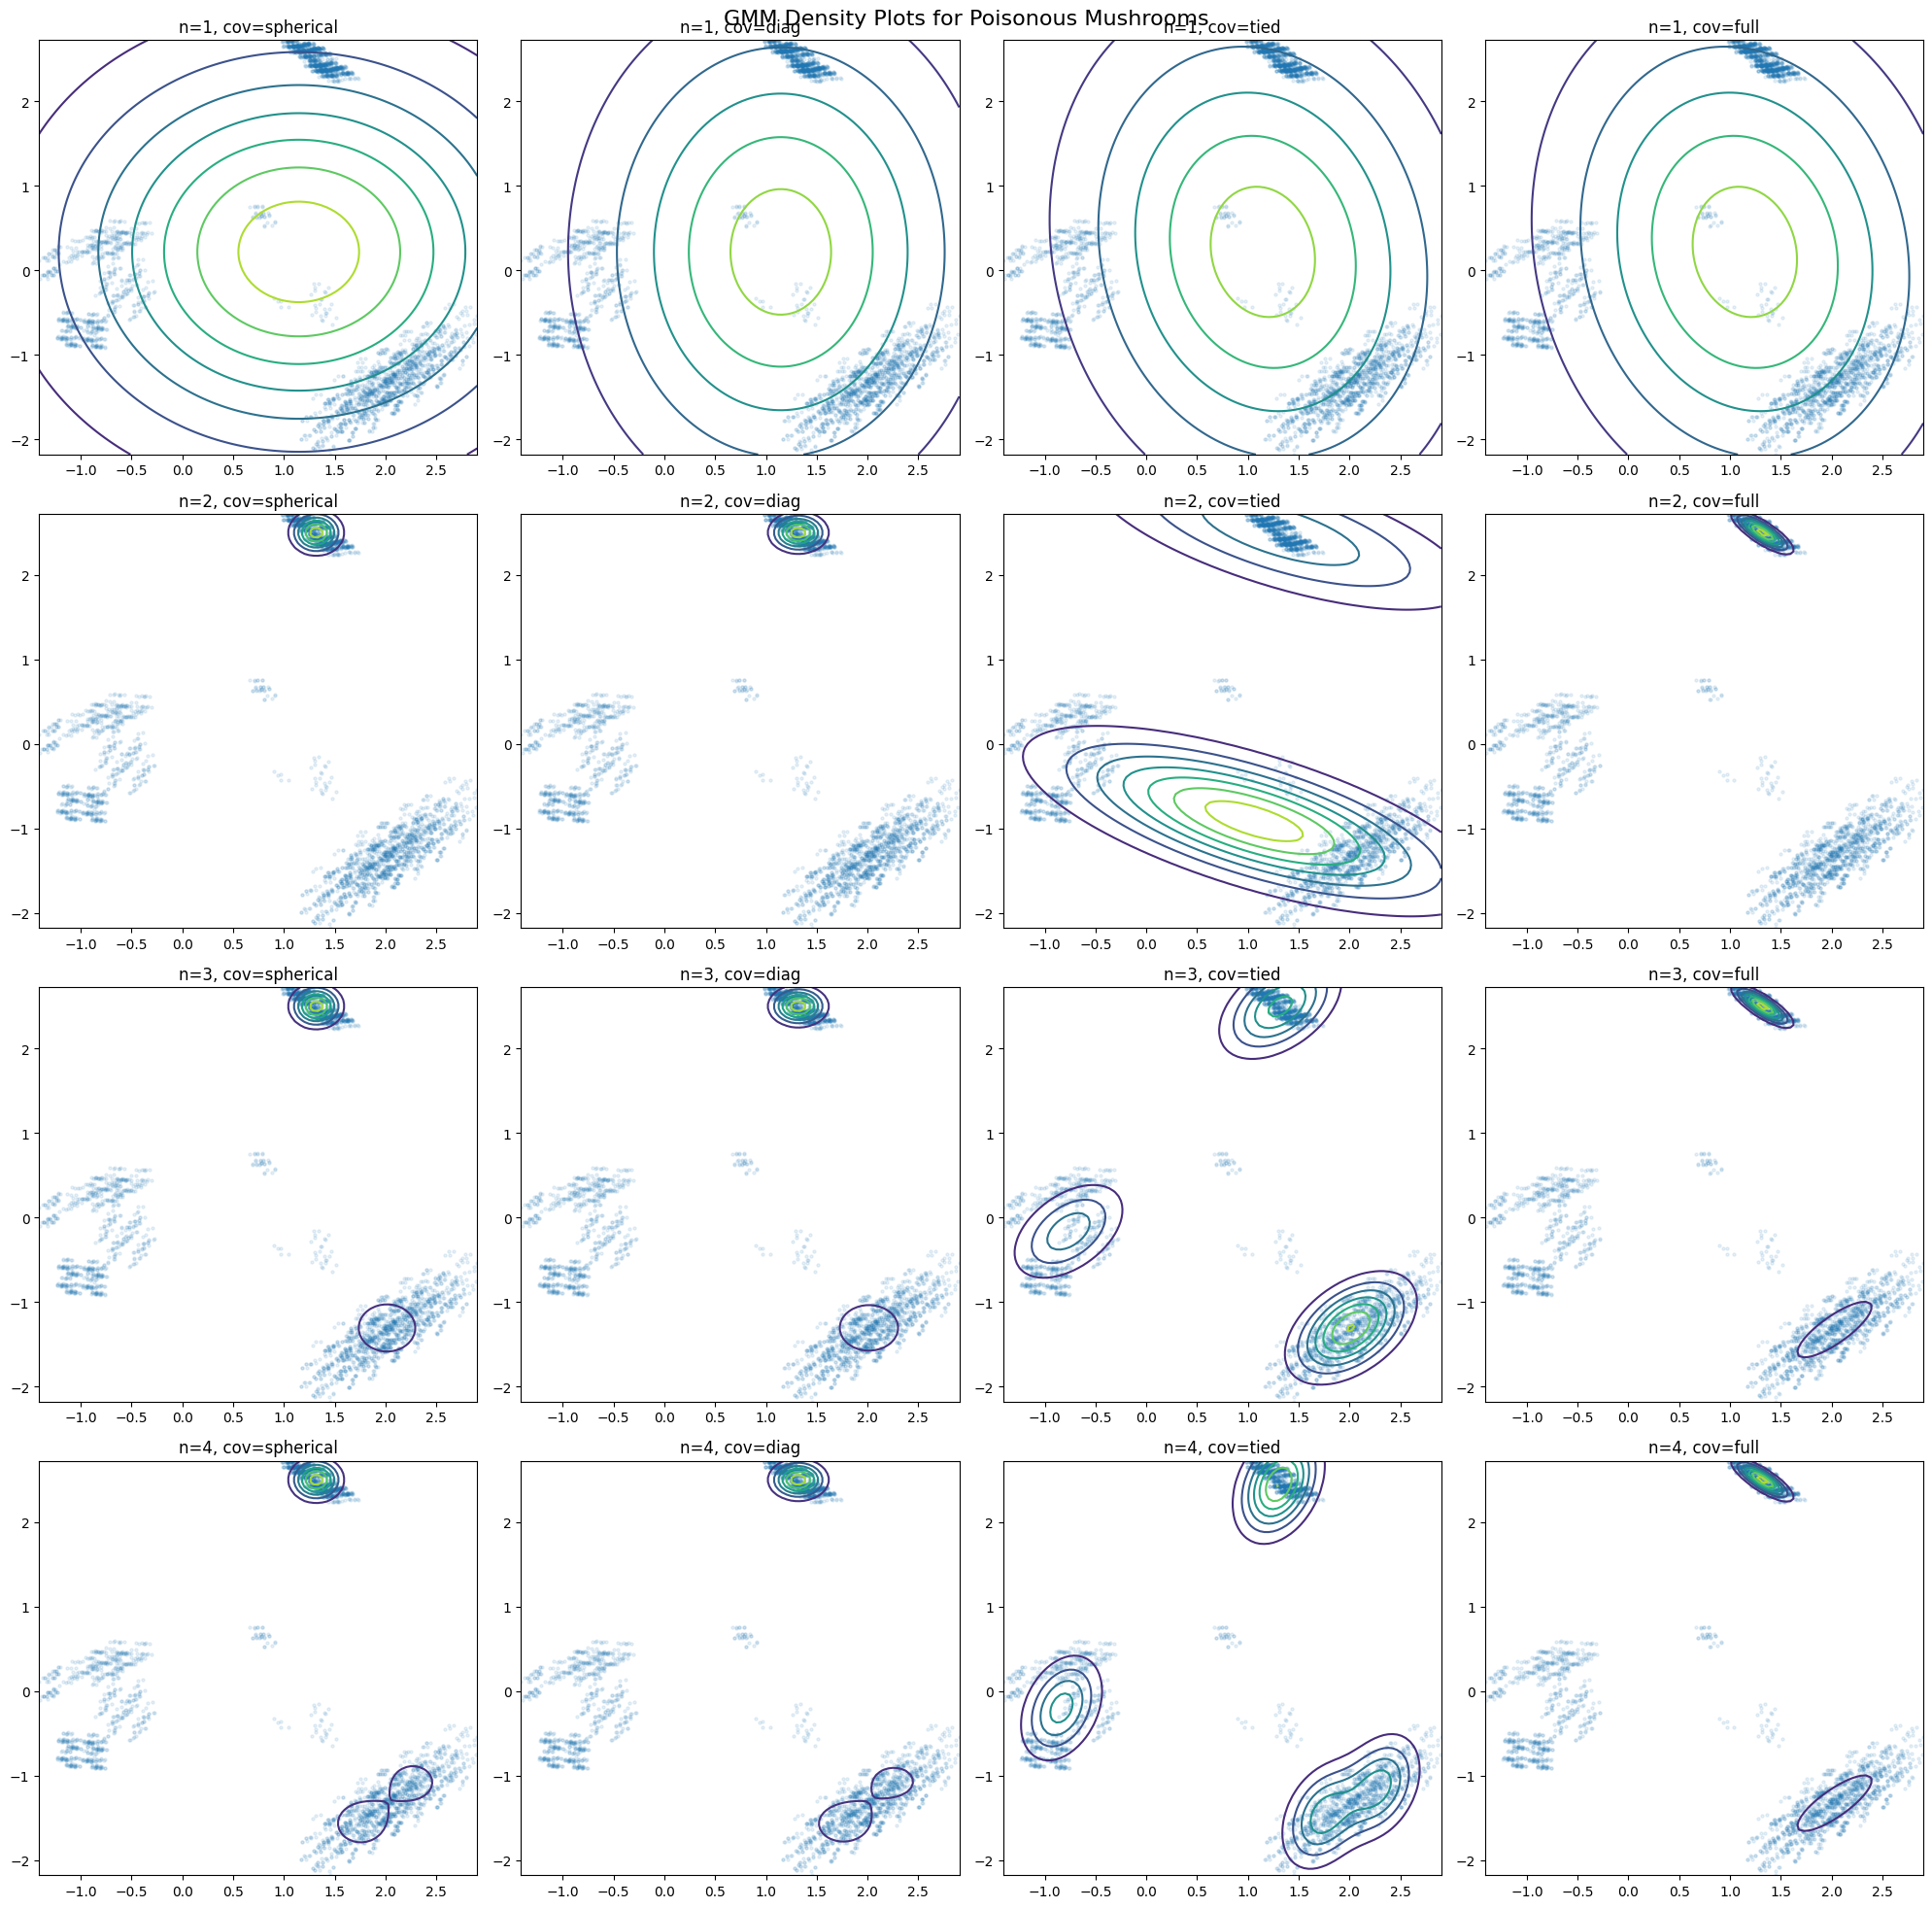

In [ ]:
def Q4():
    ### START ###

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(train_data)
    train_data_pca = pca.transform(train_data)

    # Filter positive (poisonous) examples
    poisonous_data = train_data_pca[train_labels == 1]

    # Set up the plot
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    fig.suptitle("GMM Density Plots for Poisonous Mushrooms", fontsize=16)

    n_components_range = range(1, 5)
    covariance_types = ['spherical', 'diag', 'tied', 'full']

    # Create a mesh grid for contour plotting
    x = np.linspace(poisonous_data[:, 0].min(), poisonous_data[:, 0].max(), 100)
    y = np.linspace(poisonous_data[:, 1].min(), poisonous_data[:, 1].max(), 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    for i, n_components in enumerate(n_components_range):
        for j, covariance_type in enumerate(covariance_types):
            # Fit GMM
            gmm = GaussianMixture(n_components=n_components,
                                  covariance_type=covariance_type,
                                  random_state=12345)
            gmm.fit(poisonous_data)

            # Compute the GMM density
            Z = np.exp(gmm.score_samples(pos.reshape(-1, 2))).reshape(X.shape)

            # Plot
            ax = axes[i, j]
            ax.contour(X, Y, Z)
            ax.scatter(poisonous_data[:, 0], poisonous_data[:, 1], s=5, alpha=0.1)
            ax.set_title(f"n={n_components}, cov={covariance_type}")
            ax.set_xlim(poisonous_data[:, 0].min(), poisonous_data[:, 0].max())
            ax.set_ylim(poisonous_data[:, 1].min(), poisonous_data[:, 1].max())

    plt.tight_layout()
    plt.show()

    ### END ###

Q4()

Answer:

Differences between 'tied' and 'full' covariance types:
- 'tied': All components share the same covariance matrix.
- 'full': Each component has its own covariance matrix.

In the plots:
- 'tied' plots tend to have more uniform, similarly shaped contours across components.
- 'full' plots allow for more flexibility, with potentially different shapes and orientations for each component.

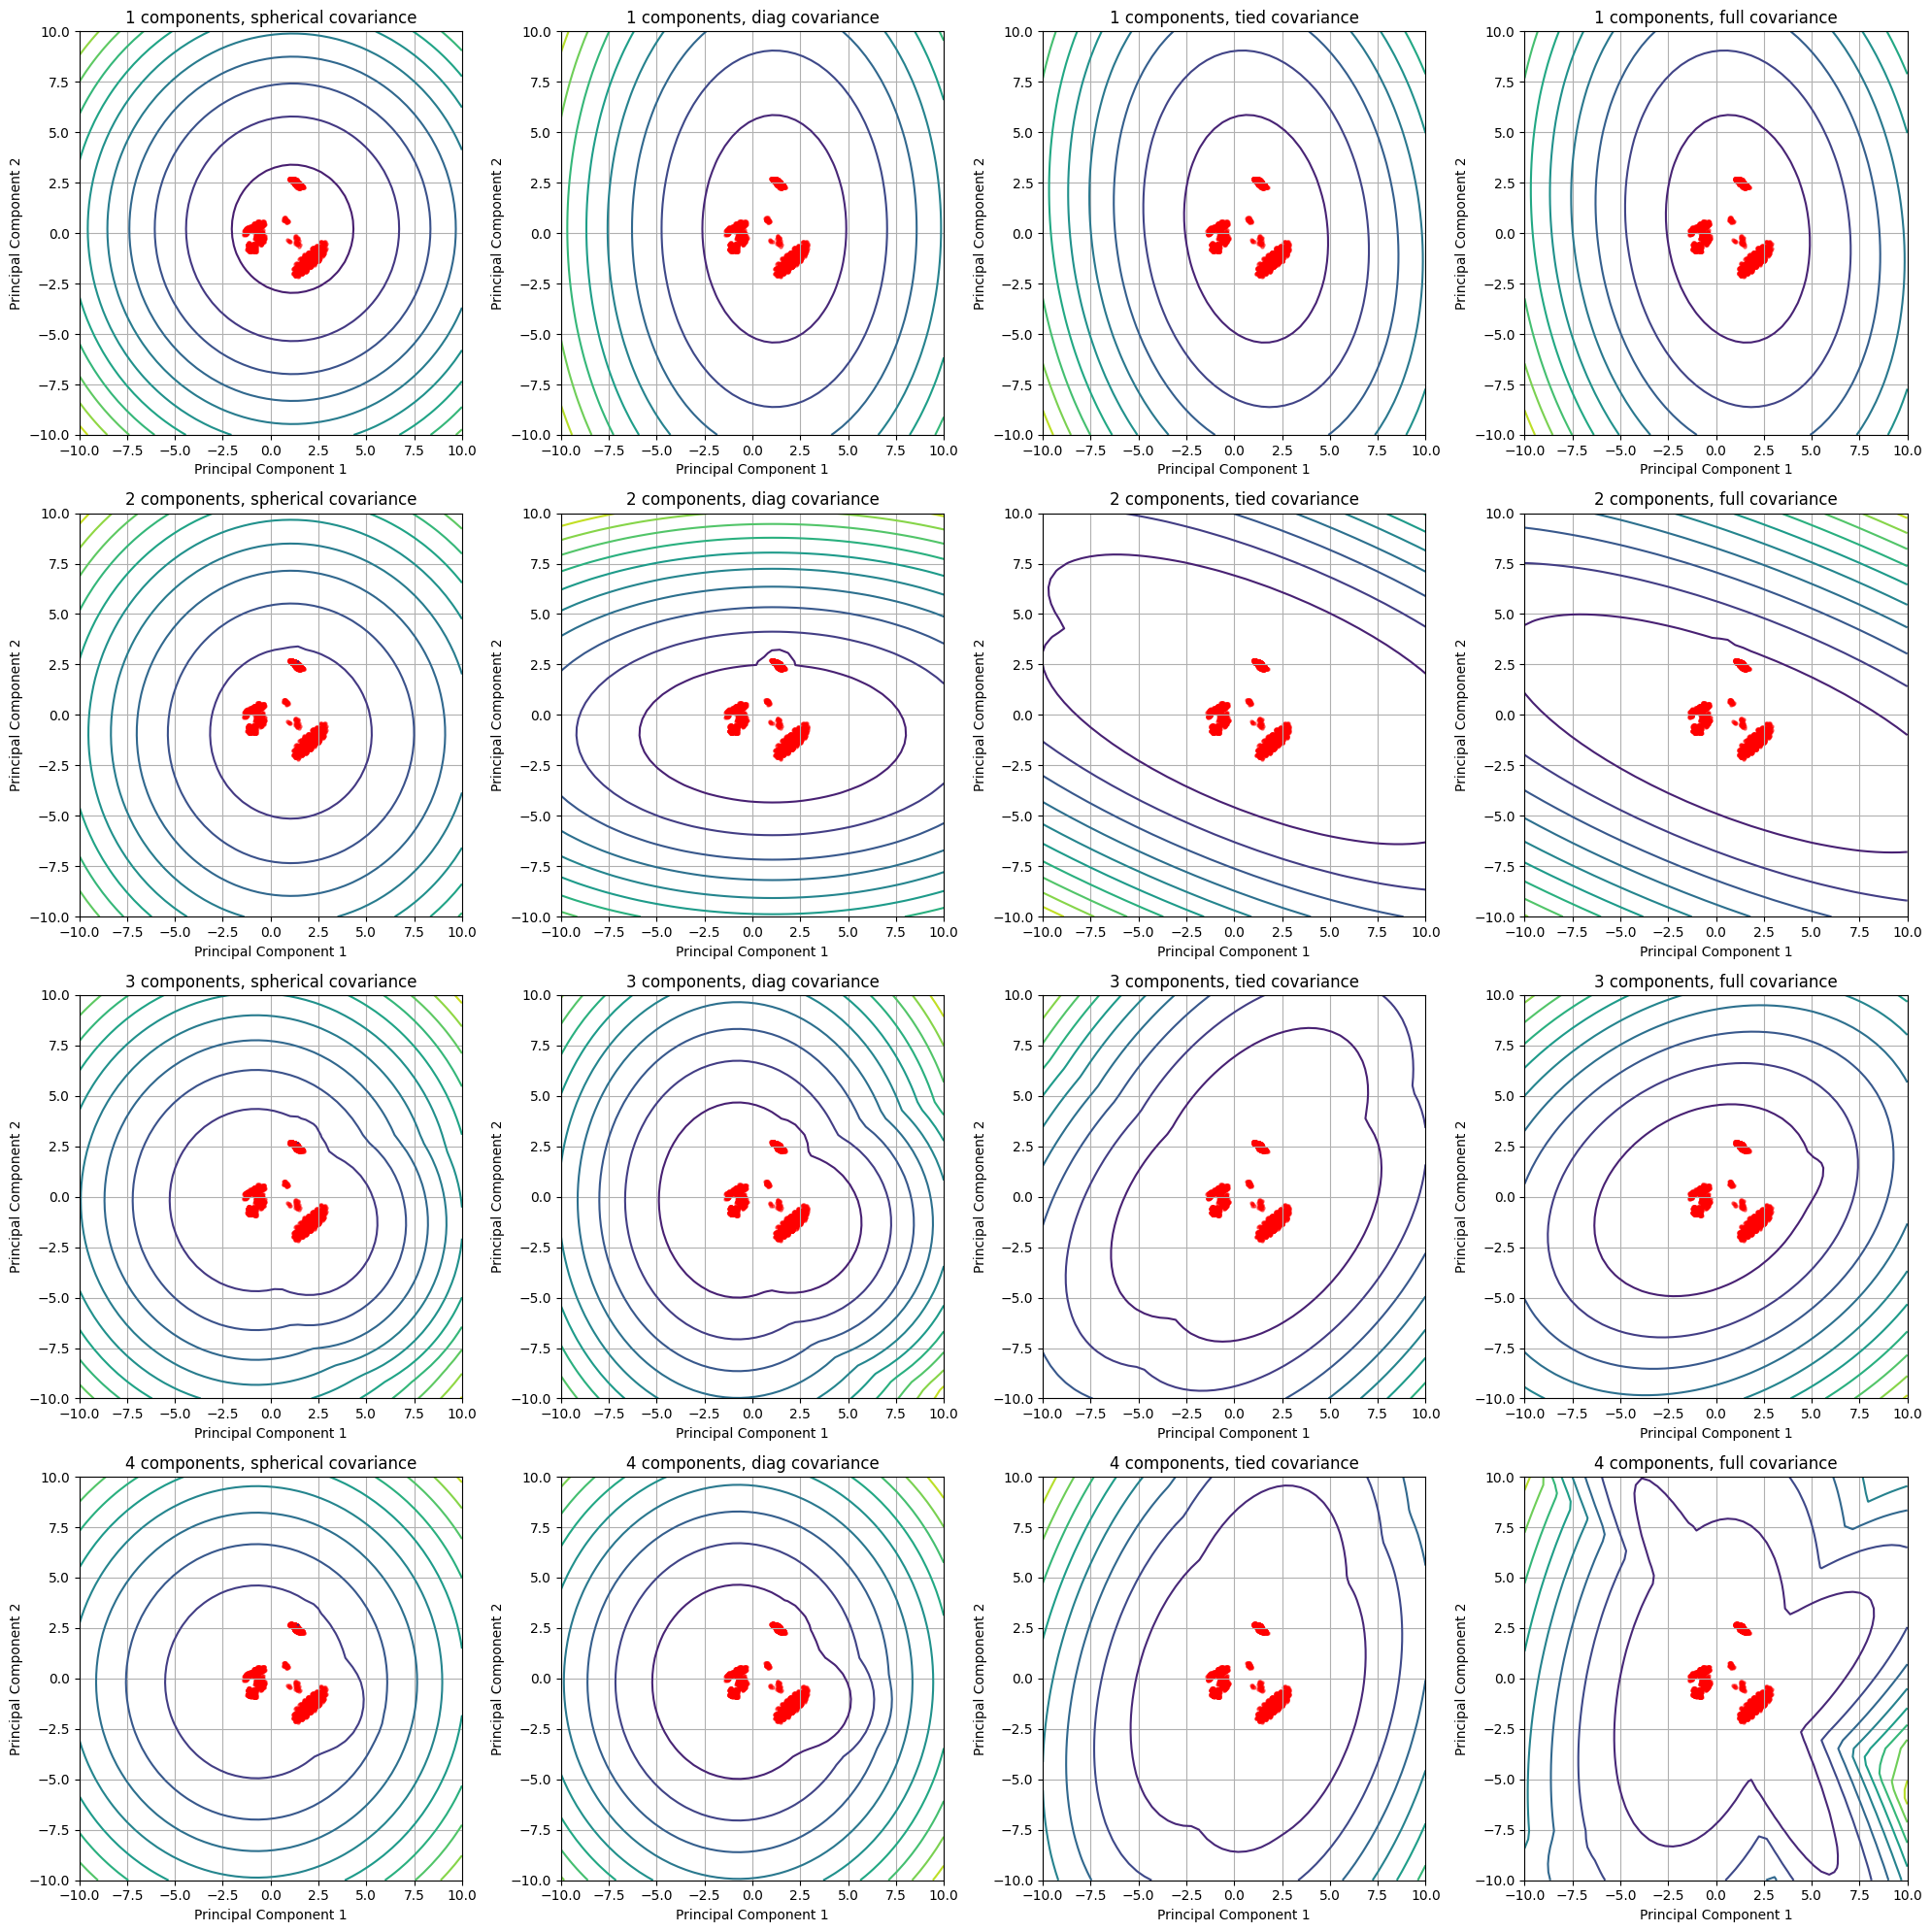

In [ ]:
def Q4():

    ### STUDENT START ###

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(train_data)
    train_data_pca = pca.transform(train_data)

    # Filter positive (poisonous) examples
    positive_examples = train_data_pca[train_labels == 1]

    # Define parameters to vary
    n_components_range = [1, 2, 3, 4]
    covariance_types = ['spherical', 'diag', 'tied', 'full']

    # Create subplots
    fig, axs = plt.subplots(len(n_components_range), len(covariance_types), figsize=(20, 20))

    # Loop through each combination of parameters
    for i, n_components in enumerate(n_components_range):
        for j, cov_type in enumerate(covariance_types):
            # Fit Gaussian Mixture Model
            gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=12345)
            gmm.fit(positive_examples)

            # Plot contours
            x = np.linspace(-10., 10.)
            y = np.linspace(-10., 10.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)

            axs[i, j].contour(X, Y, Z, levels=10, cmap='viridis')
            axs[i, j].scatter(positive_examples[:, 0], positive_examples[:, 1], s=5, color='red', alpha=0.5)
            axs[i, j].set_title(f'{n_components} components, {cov_type} covariance')
            axs[i, j].set_xlabel('Principal Component 1')
            axs[i, j].set_ylabel('Principal Component 2')
            axs[i, j].grid(True)

    plt.tight_layout()
    plt.show()

    ### STUDENT END ###

Q4()

### Question 5: Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data.
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [ ]:
def Q5():
  ### STUDENT START ###

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(train_data)
    train_data_pca = pca.transform(train_data)
    test_data_pca = pca.transform(test_data)

    # Subset of poisonous and non-poisonous examples
    train_poisonous = train_data_pca[train_labels == 1]
    train_nonpoisonous = train_data_pca[train_labels == 0]

    # Fit GMMs
    gmm_poison = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_poison.fit(train_poisonous)

    gmm_nonpoison = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_nonpoison.fit(train_nonpoisonous)

    # Predict probabilities on test set
    prob_poison = gmm_poison.score_samples(test_data_pca)  # Log likelihood of each sample under the model
    prob_nonpoison = gmm_nonpoison.score_samples(test_data_pca)

    # Predict the more likely label
    pred_labels = (prob_poison > prob_nonpoison).astype(int)

    # Calculate accuracy
    accuracy = np.mean(pred_labels == test_labels)
    print(f'Accuracy on test data: {accuracy:.4f}')

  ### STUDENT END ###

Q5()

Accuracy on test data: 0.9502


### Question 6: Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.



Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* [This spreadsheet](https://docs.google.com/spreadsheets/d/1LTEOU7q_Tgs4bX_3o2ePjDQrTRToZoc1J5XLlaRbmI0/edit?usp=sharing) should help (accessible from your google @berkeley.edu account)

* Spherical - Each GMM component has a mean per dimension, and one variance.
* Diag - Each GMM component has a mean per dimension and a variance for each dimension.
* full - Each GMM component has a mean per dimension and a "full" covariance matrix. Only the covariance matrix is symmetric, so its $[i,j]$ entry would equal to its $[j,i]$ entry.
* tied - Finally, tied has all components share a single covariance matrix. So each GMM component has a mean per dimension but they all share the same 'full' covariance matrix.

Best Configuration:
PCA Components: 4
GMM Components: 3
Covariance Type: tied
Accuracy: 0.9698
Number of Parameters: 44



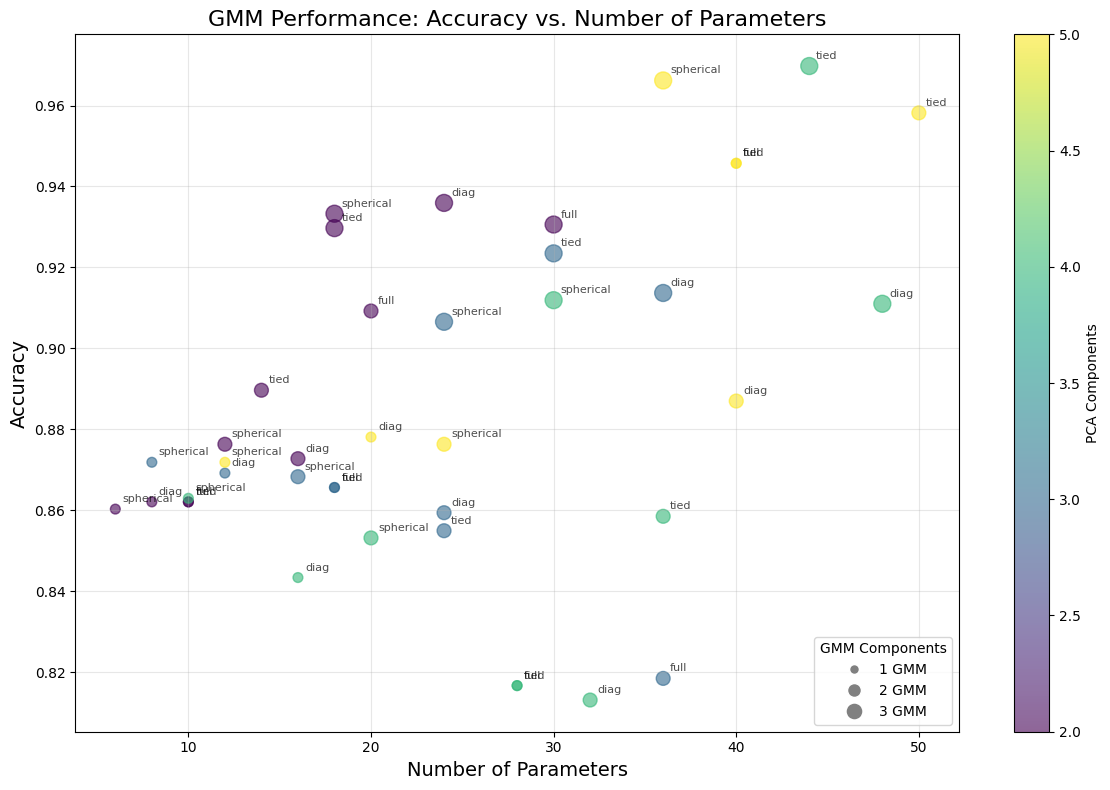

In [ ]:
from matplotlib.lines import Line2D

def Q6():

    ### STUDENT START ###

    # Dictionary to store results
    results = []

    # Define parameter ranges
    pca_components_range = [2, 3, 4, 5]
    gmm_components_range = [1, 2, 3]
    covariance_types = ['spherical', 'diag', 'tied', 'full']

    for n_pca in pca_components_range:
        # Perform PCA
        pca = PCA(n_components=n_pca)
        train_data_pca = pca.fit_transform(train_data)
        test_data_pca = pca.transform(test_data)

        # Subset of poisonous and non-poisonous examples
        train_poisonous = train_data_pca[train_labels == 1]
        train_nonpoisonous = train_data_pca[train_labels == 0]

        for n_gmm in gmm_components_range:
            for cov_type in covariance_types:
                # Calculate number of parameters for both GMMs combined
                if cov_type == 'spherical':
                    n_params = 2 * n_gmm * (n_pca + 1)
                elif cov_type == 'diag':
                    n_params = 2 * n_gmm * (2 * n_pca)
                elif cov_type == 'tied':
                    n_params = 2 * (n_gmm * n_pca + (n_pca * (n_pca + 1)) // 2)
                elif cov_type == 'full':
                    n_params = 2 * n_gmm * (n_pca + (n_pca * (n_pca + 1)) // 2)

                # Check if total number of parameters exceeds 50
                if n_params <= 50:
                    # Fit GMMs
                    gmm_poison = GaussianMixture(n_components=n_gmm, covariance_type=cov_type, random_state=12345)
                    gmm_poison.fit(train_poisonous)

                    gmm_nonpoison = GaussianMixture(n_components=n_gmm, covariance_type=cov_type, random_state=12345)
                    gmm_nonpoison.fit(train_nonpoisonous)

                    # Predict probabilities on test set
                    prob_poison = gmm_poison.score_samples(test_data_pca)
                    prob_nonpoison = gmm_nonpoison.score_samples(test_data_pca)

                    # Predict the more likely label
                    pred_labels = (prob_poison > prob_nonpoison).astype(int)

                    # Calculate accuracy
                    accuracy = np.mean(pred_labels == test_labels)

                    # Store results
                    results.append({
                        'PCA Components': n_pca,
                        'GMM Components': n_gmm,
                        'Covariance Type': cov_type,
                        'Accuracy': accuracy,
                        'Parameters': n_params
                    })

    # Convert results to DataFrame for analysis
    results_df = pd.DataFrame(results)

    # Find best configuration
    best_config = results_df.loc[results_df['Accuracy'].idxmax()]
    best_accuracy = best_config['Accuracy']
    best_parameters = best_config['Parameters']

    print(f'Best Configuration:')
    print(f'PCA Components: {int(best_config["PCA Components"])}')
    print(f'GMM Components: {int(best_config["GMM Components"])}')
    print(f'Covariance Type: {best_config["Covariance Type"]}')
    print(f'Accuracy: {best_accuracy:.4f}')
    print(f'Number of Parameters: {int(best_parameters)}')
    print()

    # Create scatter plot with enhanced visualization
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(results_df['Parameters'], results_df['Accuracy'],
                          c=results_df['PCA Components'], s=results_df['GMM Components']*50,
                          alpha=0.6, cmap='viridis')

    plt.title('GMM Performance: Accuracy vs. Number of Parameters', fontsize=16)
    plt.xlabel('Number of Parameters', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.colorbar(scatter, label='PCA Components')

    # Add legend for GMM components
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'{size} GMM',
                              markerfacecolor='gray', markersize=np.sqrt(size*50))
                       for size in gmm_components_range]
    plt.legend(handles=legend_elements, title='GMM Components', loc='lower right')

    # Add annotations for covariance types
    for i, row in results_df.iterrows():
        plt.annotate(row['Covariance Type'],
                     (row['Parameters'], row['Accuracy']),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=8, alpha=0.7)

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    ### STUDENT END ###

Q6()

PCA reduction to 4 components and a 3-component tied GMM achieved 96.98% accuracy. While strong, higher accuracy may be possible by adjusting PCA components, GMM components, or covariance type. Balancing these parameters can optimize performance and model complexity.